# Projeto 1

Nome:*Matheus Augusto Soares*

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
from jupyterthemes import jtplot

#### Pergunta

A importância que o estado demonstra possuir pela industria bélica, possui relação com um IDH de maneira proporcional?

#### Introdução

A historia do desenvolvimento dos países é sempre algo que deve ser analizado, principalmente se levado em conta os inúmeros influenciadores do desenvolvimento de uma nação. Partindo dessa visão das influências, e possível tentar pensar em algumas das coisas que pode ser a causa da mudança no desenvolvimento. Quando as pessoas pensam em países bem desenvolvidos normalmente podem pensar na Europa, ou podem pensar na atual maior potência, os Estados Unidos da America. Se isolarmos esse ultimo exemplo e pensar na suas características mais marcantes, e possivel isolar uma lista de fatores cruciais das caracteristicas do EUA, mas uma em particular é muito intrigante, a relação dessa nação com a sua militarização


Depois de isolar esse fator, e possível chegar a um questionamento, será que essa demonstração de poder, esse apreço do estado e da população pela indústria bélica pode estar relacionado com o IDH de outros países? Será que existe uma relação de proporcionalidade? E através de dados vamos analisar essa pergunta

### *Leitura dos dados*

In [2]:
data = pd.read_excel('hdi_human_development_index.xlsx')

In [3]:
importacao = pd.read_excel('arms_imports_us_inflation_adjusted.xlsx')

In [4]:
militar = pd.read_excel('armed_forces_personnel_total.xlsx')

#### Join dos dataframes

In [5]:
data_2010 = data.loc[:, ["geo", 2010]]
importacao_2010 = importacao.loc[:, ["geo", 2010]]
militar_2010 = militar.loc[:, ["geo", 2010]]

In [6]:
data_idx = data_2010.set_index('geo')
importacao_idx = importacao_2010.set_index('geo')
militar_idx = militar_2010.set_index('geo')

In [7]:
df1 = data_idx.join(importacao_idx, how='inner', lsuffix='_IDH', rsuffix='_importacao')

In [8]:
militar_idx = militar_idx.rename(columns={2010: '2010_militares'})
df=df1.join(militar_idx, how="inner")
df.head()

,2010_IDH,2010_importacao,2010_militares
geo,,,
Afghanistan,0.454,377000000.0,307000.0
Albania,0.738,NaN,14700.0
Algeria,0.724,834000000.0,317000.0
Angola,0.495,NaN,117000.0
Argentina,0.816,11000000.0,104000.0


#### Salvando o Dataframe

In [9]:
data.to_csv( 'my_data.csv', index=True)

#### Limpeza

In [10]:
df=df.dropna()
df.head()

,2010_IDH,2010_importacao,2010_militares
geo,,,
Afghanistan,0.454,3.770000e+08,307000.0
Algeria,0.724,8.340000e+08,317000.0
Argentina,0.816,1.100000e+07,104000.0
Armenia,0.729,5.200000e+07,55500.0
Australia,0.927,1.510000e+09,56600.0


### *Análise dos dados*

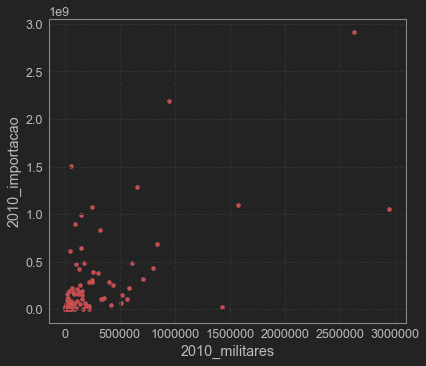

In [11]:
jtplot.style(theme='monokai',gridlines='--')
df.plot.scatter(x= "2010_militares", y ="2010_importacao",color="r")

In [12]:
df_filtrado=df[np.abs(df["2010_importacao"]-df["2010_importacao"].mean()) <= (2*df["2010_importacao"].std())] 
df_filtrado=df[np.abs(df["2010_militares"]-df["2010_militares"].mean()) <= (2*df["2010_militares"].std())]


#### Retirada dos Outliers

In [59]:
df_novo=df[(df['2010_militares']<=250000)&(df['2010_importacao']<=300000000)]

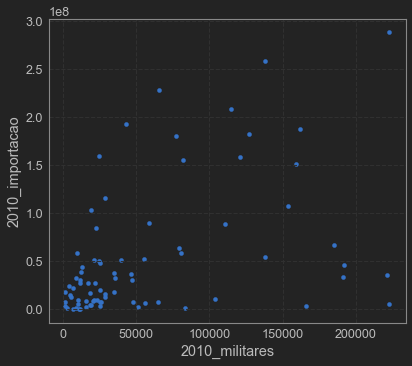

In [65]:
df_novo.plot.scatter(x= "2010_militares", y ="2010_importacao",color="b")

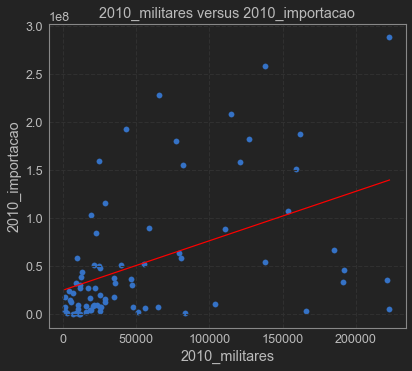

In [70]:
#Utilizando a função aprendida na Aula 5
def dispersao_com_reta(dados, variavel_x, variavel_y):
    dados_X = dados[variavel_x]
    dados_Y = dados[variavel_y]
    
    cov = dados_X.cov(dados_Y)

    var_X = dados_X.var()
    var_Y = dados_Y.var()

    mX = dados_X.mean()
    mY = dados_Y.mean()
    
    a = cov / var_X
    b = mY - a*mX

    min_X = dados_X.min()
    max_X = dados_X.max()

    plt.scatter(dados_X, dados_Y)
    plt.plot((min_X, max_X), (a*min_X + b, a*max_X + b), color='red')

    plt.title('{0} versus {1}'.format(variavel_x, variavel_y))
    plt.xlabel(variavel_x)
    plt.ylabel(variavel_y)
    
    return a, b

a, b = dispersao_com_reta(df_novo, variavel_x="2010_militares", variavel_y="2010_importacao")

Ao observar o gráfico e possivel que há uma correlação positiva com as variáveis de importação e de número de militares

In [74]:
df_novo.corr(method='pearson', min_periods=1)

,2010_IDH,2010_importacao,2010_militares
2010_IDH,1.000000,0.099372,-0.106189
2010_importacao,0.099372,1.000000,0.462054
2010_militares,-0.106189,0.462054,1.000000


Ao criar a tabela de correlação os números demonstram a existência entre a correlação de importação com o numero de militares, porém infelizmente essa era uma coisa ja esperada de que fosse acontecer. E infelizmente os numeros que demonstram a correlação entre as variáveis e o IDH, acabam que mostrando dados que representam uma relação muito pequena entre os objetos de estudo, sendo o IDH com a importação possuindo uma correlação muito pequena positiva, e o número de militares com IDH uma pequena correlação negativa

Mas vamos tentar vizualizar oque os dados demonstram:

c, d = dispersao_com_reta(df_novo, variavel_x="2010_IDH", variavel_y="2010_importacao")

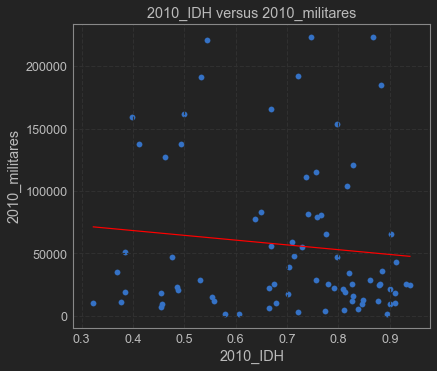

In [72]:
e, f = dispersao_com_reta(df_novo, variavel_x="2010_IDH", variavel_y="2010_militares")

Os gráficos como o esperado demonstram oque foi analizado do gráfico de correlação

Mas ainda é possível fazer mais uma análise, porém dessa vez levando em conta outros anos, para observar se 2010 demostra esse resultado isoladamente